# Práctica: Modelos de Regresión Lineal Simple-Múltiple-Polinomial

* Garcia Sánchez Diego Emiliano

* Sánchez Martínez Felipe

1 de diciembre de 2023

## 1.- Salario vs Años de experiencia

El siguiente DataSets es muy sencillo, ya que representa vagamente como los años de experiencia varia el salario que recibe un profesionista, por lo tanto se opto por una simple regresion lineal

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
salaries_dataset = pd.read_csv('salario_experiencia/Salary.csv')
salaries_dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = salaries_dataset.iloc[:, :-1].values
y = salaries_dataset.iloc[:, -1]. values

Representacion de datos:

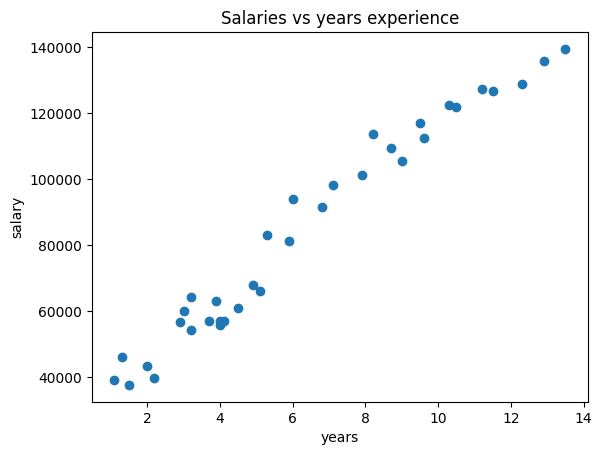

In [ ]:
plt.scatter(X, y)
plt.title("Salaries vs years experience")
plt.xlabel("years")
plt.ylabel('salary')


plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

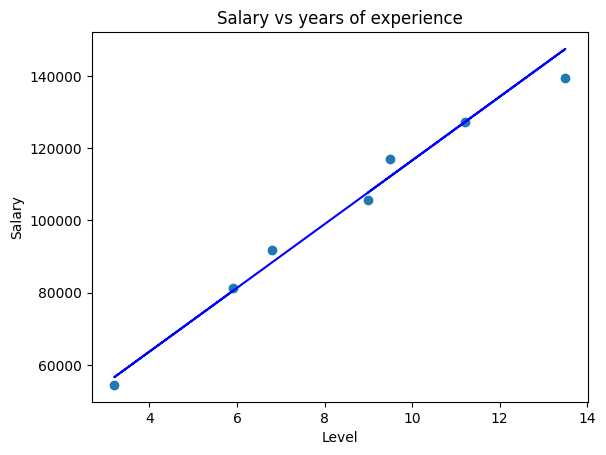

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, linear_regression.predict(X_test), color = 'blue')
plt.title('Salary vs years of experience')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

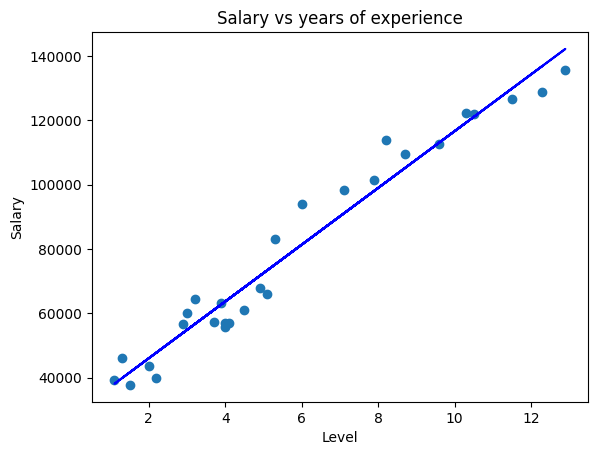

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, linear_regression.predict(X_train), color = 'blue')
plt.title('Salary vs years of experience')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

### Metricas:

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
mean_squared_error(y_train, linear_regression.predict(X_train))


40011697.56943382

In [ ]:
mean_absolute_error(y_train, linear_regression.predict(X_train))

5450.4897296407435

### Accuracy

Accuracy sobre datos de entrenamiento:

In [ ]:
score = r2_score(y_train, linear_regression.predict(X_train))
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 96.0%


Accuracy sobre datos de testeo:

In [ ]:
score = r2_score(y_test, linear_regression.predict(X_test))
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 98.0%


Nos ha dado un muy buen resultado la regresion lineal simple en este data set

## 2.-Precio de Casas

El siguiente DataSet depende de muchas variables y se refiere al precio que obtiene una casa dependiendo del número de cuartos, dormitorios, baños, tamaño, etc.

Por lo tanto optamos por una regresion lineal multiple y se ocuparon tecnicas de encoder para tener todo en una representación numerica.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
house_prices_dataset = pd.read_csv('Precio de Casas/Housing.csv')
house_prices_dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Usaremos un label encoder para poder pasar los datos de String a numerico

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
mainroad = LabelEncoder()
guestroom = LabelEncoder()
basement = LabelEncoder()
hotwaterheating = LabelEncoder()
airconditioning = LabelEncoder()
prefarea = LabelEncoder()

In [ ]:
numeric_dataframe = house_prices_dataset.copy()

In [ ]:
numeric_dataframe['mainroad'] = mainroad.fit_transform(house_prices_dataset['mainroad'])
numeric_dataframe['basement'] = basement.fit_transform(house_prices_dataset['basement'])
numeric_dataframe['hotwaterheating'] = hotwaterheating.fit_transform(house_prices_dataset['hotwaterheating'])
numeric_dataframe['airconditioning'] = airconditioning.fit_transform(house_prices_dataset['airconditioning'])
numeric_dataframe['prefarea'] = prefarea.fit_transform(house_prices_dataset['prefarea'])
numeric_dataframe['guestroom'] = guestroom.fit_transform(house_prices_dataset['guestroom'])
numeric_dataframe.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
X = numeric_dataframe.iloc[:, 1:].values
y = numeric_dataframe.iloc[:, 0].values


Variable Dummy en la parte del mobiliario, por lo tanto usaremos One hot encoder para eliminarlo

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [ ]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [11])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[1.0, 0.0, 0.0, ..., 1, 2, 1],
       [1.0, 0.0, 0.0, ..., 1, 3, 0],
       [0.0, 1.0, 0.0, ..., 0, 2, 1],
       ...,
       [0.0, 0.0, 1.0, ..., 0, 0, 0],
       [1.0, 0.0, 0.0, ..., 0, 0, 0],
       [0.0, 0.0, 1.0, ..., 0, 0, 0]], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis= 1))

[[ 5300799.21  4753000.  ]
 [ 6230172.44  8890000.  ]
 [ 4926179.2   7455000.  ]
 [ 4749386.11  3773000.  ]
 [ 4668140.56  3780000.  ]
 [ 3476165.27  3703000.  ]
 [ 7228208.93  7910000.  ]
 [ 3243253.33  3500000.  ]
 [ 4976514.55  4098500.  ]
 [ 5634982.34  5250000.  ]
 [ 4740275.9   4200000.  ]
 [ 7283868.91  9870000.  ]
 [ 4259194.    3290000.  ]
 [ 4534513.25  4095000.  ]
 [ 6243001.54  6230000.  ]
 [ 5640473.8   5229000.  ]
 [ 5411600.9   3150000.  ]
 [ 6907552.28  6580000.  ]
 [ 2575597.21  3570000.  ]
 [ 3534130.72  4473000.  ]
 [ 4870214.48  6020000.  ]
 [ 4621283.8   5950000.  ]
 [ 6126310.28  6615000.  ]
 [ 5685569.83  5950000.  ]
 [ 3689489.32  4550000.  ]
 [ 4137196.02  4403000.  ]
 [ 2606554.83  3010000.  ]
 [ 4215524.7   4200000.  ]
 [ 3477520.68  3640000.  ]
 [ 4801603.17  7350000.  ]
 [ 6457997.62  5950000.  ]
 [ 3036662.09  2100000.  ]
 [ 6625806.29  8295000.  ]
 [ 2651466.25  3150000.  ]
 [ 6256843.85  5460000.  ]
 [ 2854693.44  3360000.  ]
 [ 4777190.87  4830000.  ]
 

### Accuracy:

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Accuracy sobre datos de entrenamiento:

> Indented block



In [ ]:
score = r2_score(y_train, regressor.predict(X_train))
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 70.0%


Accuracy sobre datos de prueba:

In [ ]:
score = r2_score(y_test, regressor.predict(X_test))
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 59.0%


Al tener varias variables dispersas hace que la precision del algoritmo sea baja, asi que podria intentar nuevamente con otro algoritmo de ML.

## 3.-Carros

El siguiente data set, corresponde a predecir el valor de un carro, dependiendo si esta vendido, su edad y el km que tiene.

Como son varias variables aplicaremos dos, MLR o Polynomail Multiple

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
carros_dataset = pd.read_csv('Carros/carros.csv')
carros_dataset.head()

,precio,vendido,edad_del_modelo,km_by_year
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [ ]:
X = carros_dataset.iloc[:, 1:].values
y = carros_dataset.iloc[:, 0].values

### Regresion Lineal Multiple

Entrenamiento del modelo:

In [ ]:
from sklearn.model_selection import train_test_split
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Como son varias dimensiones optamos por ver la aproximacion del modelo con la variable dependiente

In [ ]:
# Predicting
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis= 1))

[[73029.86 65674.19]
 [69504.86 79947.11]
 [62075.34 40917.46]
 ...
 [82983.   89511.44]
 [52080.77 93795.28]
 [48173.59 31384.59]]


### Accuracy:

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
score = r2_score(y_train, regressor.predict(X_train))
print("The accuracy of our model with train data is {}%".format(round(score, 2) *100))

The accuracy of our model with train data is 23.0%


In [ ]:
score = r2_score(y_test, regressor.predict(X_test))
print("The accuracy of our model with test data is {}%".format(round(score, 2) *100))

The accuracy of our model with test data is 24.0%


### Implementacion de prueba con una regresion polinomica multiple



In [ ]:
# Training the polynomial Multiple Regression model on the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2) # degree of polynomio
X_poly = poly_reg.fit_transform(X_train)

lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y_train)

LinearRegression()

Igual, como son varias dimensiones optamos por ver la aproximacion del modelo con la variable dependiente

In [ ]:
# Predicting
y_pred = lin_reg_poly.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis= 1))

[[76067.56 65674.19]
 [74617.47 79947.11]
 [64908.36 40917.46]
 ...
 [80359.98 89511.44]
 [49414.46 93795.28]
 [42646.59 31384.59]]


### Accuracy:

In [ ]:
score = r2_score(y_train, lin_reg_poly.predict(X_poly))
print("The accuracy of our model with train data is {}%".format(round(score, 2) *100))

The accuracy of our model with train data is 24.0%


In [ ]:
score = r2_score(y_test, lin_reg_poly.predict(poly_reg.transform(X_test)))
print("The accuracy of our model with test data is {}%".format(round(score, 2) *100))

The accuracy of our model with test data is 26.0%


Al parecer ninguna regression ha sido completamente efectiva dentro del dataset, lo que significa que deberia de probar con otros modelos de ML

## 4.- Calificaciones vs Horas de estudio

El siguiente dataset es la representacion de la relacione entre las horas de estudio y las calificaciones obtenidas en un examen de estudiantes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
student_scores_dataset = pd.read_csv('studentScore/student_scores.csv')
student_scores_dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = student_scores_dataset.iloc[:, :-1].values
y = student_scores_dataset.iloc[:, -1]. values


### Visualicacion de los datos:

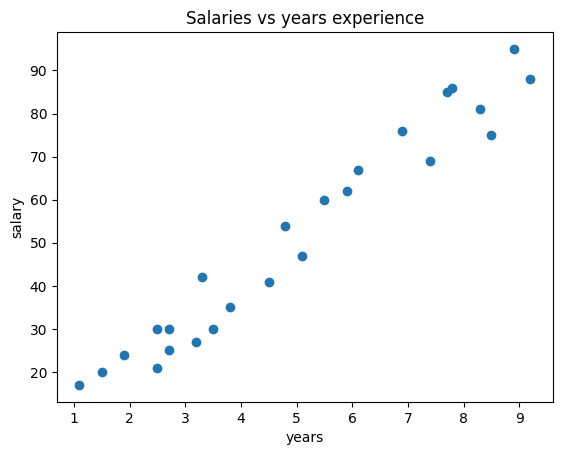

In [ ]:
plt.scatter(X, y)
plt.title("Salaries vs years experience")
plt.xlabel("years")
plt.ylabel('salary')


plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101)

### Entrenamiento del modelo

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

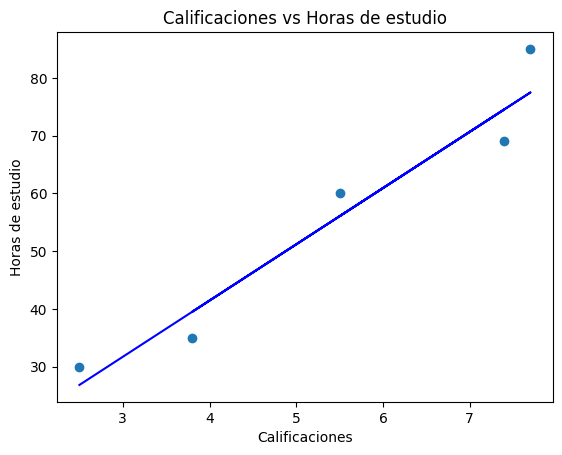

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, linear_regression.predict(X_test), color = 'blue')
plt.title('Calificaciones vs Horas de estudio')
plt.xlabel('Calificaciones')
plt.ylabel('Horas de estudio')
plt.show()

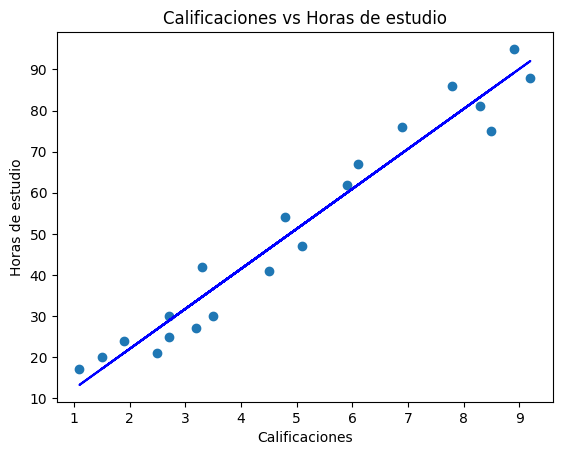

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, linear_regression.predict(X_train), color = 'blue')
plt.title('Calificaciones vs Horas de estudio')
plt.xlabel('Calificaciones')
plt.ylabel('Horas de estudio')
plt.show()

### Accuracy:

In [ ]:
score = r2_score(y_train, linear_regression.predict(X_train))
print("The accuracy of our model with train data is {}%".format(round(score, 2) *100))

The accuracy of our model with train data is 95.0%


In [ ]:
score = r2_score(y_test, linear_regression.predict(X_test))
print("The accuracy of our model with test data is {}%".format(round(score, 2) *100))

The accuracy of our model with test data is 94.0%


### De forma Polinomial

In [ ]:
# Training the polynomial Regression model on the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2) # degree of polynomio
X_poly = poly_reg.fit_transform(X_train)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression()

Se decidio que sea de grado 2, aunque no hay diferencia con una regression lineal, si le agregamos un grado mas surge overfitting por la presencia de la "oscilación de Runge"

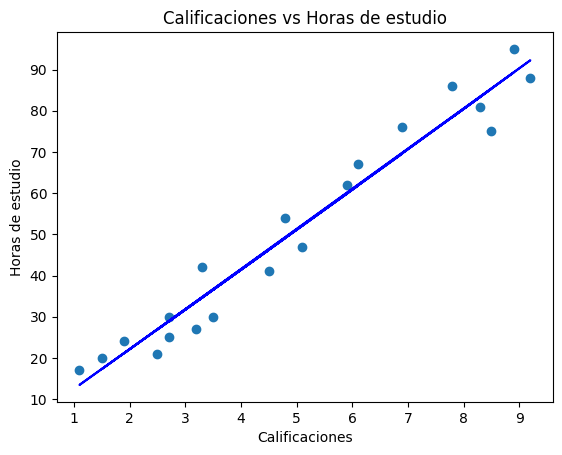

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lin_reg_2.predict(poly_reg.transform(X_train)), color = 'blue')
plt.title('Calificaciones vs Horas de estudio')
plt.xlabel('Calificaciones')
plt.ylabel('Horas de estudio')
plt.show()

### Accuracy:

In [ ]:
score = r2_score(y_train, lin_reg_2.predict(poly_reg.transform(X_train)))
print("The accuracy of our model with train data is {}%".format(round(score, 2) *100))

The accuracy of our model with train data is 95.0%


In [ ]:
score = r2_score(y_test, lin_reg_2.predict(poly_reg.transform(X_test)))
print("The accuracy of our model with test data is {}%".format(round(score, 2) *100))

The accuracy of our model with test data is 94.0%


El mejor modelo seria la regresion lineal simple, debido a que es mas facil y da buenos resultados

## 5.- Prediccion de humedad

El siguiente dataset presenta el nivel de humedad de acuerdo a la temperatura, velocidad del viento y a la presion. Como hay múltiples variables independientes que pueden afectar la variable dependiento aplicaremos aplicaremos dos, MLR o Polynomail Multiple

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
weather_dataset = pd.read_csv('/content/WeatherDataM.csv')
weather_dataset.head()

,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,9.472222,14.1197,1015.13,0.89
1,9.355556,14.2646,1015.63,0.86
2,9.377778,3.9284,1015.94,0.89
3,8.288889,14.1036,1016.41,0.83
4,8.755556,11.0446,1016.51,0.83


In [ ]:
X = weather_dataset.iloc[:, :-1].values
y = weather_dataset.iloc[:, -1].values

### Regresion Lineal Multiple

Entrenamiento del modelo:

In [ ]:
from sklearn.model_selection import train_test_split
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis= 1))

[[0.41 0.4 ]
 [0.53 0.47]
 [0.77 0.76]
 [0.77 0.78]
 [0.79 0.79]
 [0.8  0.86]
 [0.69 0.8 ]
 [0.56 0.58]
 [0.39 0.43]
 [0.57 0.59]]


### Accuracy:

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
score = r2_score(y_train, regressor.predict(X_train))
print("The accuracy of our model with train data is {}%".format(round(score, 2) *100))

The accuracy of our model with train data is 91.0%


In [ ]:
score = r2_score(y_test, regressor.predict(X_test))
print("The accuracy of our model with test data is {}%".format(round(score, 2) *100))

The accuracy of our model with test data is 92.0%


### Implementacion de prueba con una regresion polinomica multiple

In [ ]:
# Training the polynomial Multiple Regression model on the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2) # degree of polynomio
X_poly = poly_reg.fit_transform(X_train)

lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y_train)

LinearRegression()

In [ ]:
# Predicting
y_pred = lin_reg_poly.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis= 1))

[[0.38 0.4 ]
 [0.49 0.47]
 [0.78 0.76]
 [0.75 0.78]
 [0.81 0.79]
 [0.8  0.86]
 [0.63 0.8 ]
 [0.58 0.58]
 [0.44 0.43]
 [0.58 0.59]]


### Accuracy:

In [ ]:
score = r2_score(y_train, lin_reg_poly.predict(X_poly))
print("The accuracy of our model with train data is {}%".format(round(score, 2) *100))

The accuracy of our model with train data is 95.0%


In [ ]:
score = r2_score(y_test, lin_reg_poly.predict(poly_reg.transform(X_test)))
print("The accuracy of our model with test data is {}%".format(round(score, 2) *100))

The accuracy of our model with test data is 87.0%


El accuracy de ambos modelos varia un poco por lo que para decidir cual es "mejor" debesmos considerar si la generalización es una prioridad y el modelo debe funcionar bien en nuevos datos (primer modelo) o si se valora más el rendimiento en el conjunto de entrenamiento (segundo modelo).